In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("/home/martin/Projects/SparseSequentialLearning/results/run_Simulation Example_20250506_195253/log.csv", sep=',', header=0, encoding='utf-8')

In [8]:
df.sort_values(['Name', 'Trial', 'Round'])

# Compute the cumulative reward
df['cum_reward'] = df.groupby(['Name', 'Trial'])['Reward'].cumsum()
df['cum_regret'] = df.groupby(['Name', 'Trial'])['Regret'].cumsum()
df['cum_min_regret'] = df.groupby(['Name', 'Trial'])['Regret'].cummin()
df['cum_avg_regret'] = df['cum_regret'] / df['Round']

data = (
    df
    .groupby(['Name', 'Round'])[['cum_reward', 'cum_regret', 'cum_min_regret', 'cum_avg_regret']]
    .agg(
        avg_cum_reward=('cum_reward', 'mean'),
        std_cum_reward=('cum_reward', 'std'),
        avg_cum_regret=('cum_regret', 'mean'),
        std_cum_regret=('cum_regret', 'std'),
        avg_cum_min_regret=('cum_min_regret', 'mean'),
        std_cum_min_regret=('cum_min_regret', 'std'),
        avg_cum_avg_regret=('cum_avg_regret', 'mean'),
        std_cum_avg_regret=('cum_avg_regret', 'std'),
    )
    .reset_index()
)

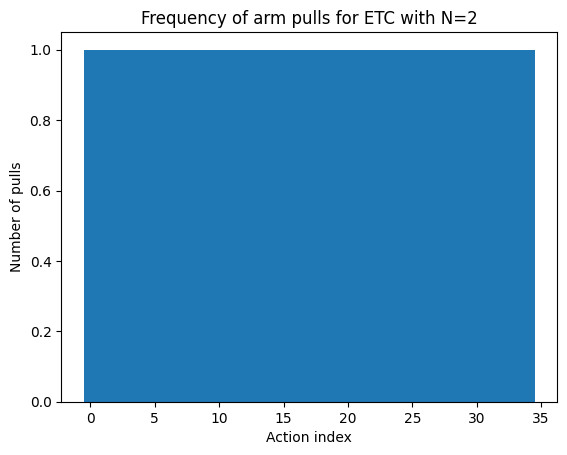

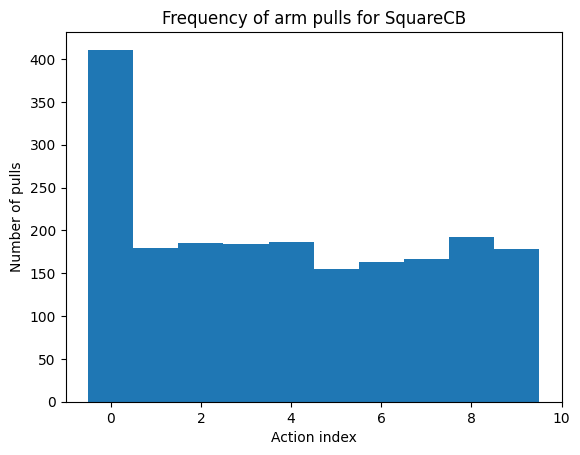

In [16]:
names = df['Name'].to_list()

actions = df[["Name", "Action_index"]]
for name in set(names):
    # time = data.loc[data['Name'] == name, 'Round'].to_numpy()
    # reward = data.loc[data['Name'] == name,'avg_cum_reward'].to_numpy()
    # std_reward = data.loc[data['Name'] == name,'std_cum_reward'].to_numpy()
    vals = actions.loc[actions["Name"] == name]["Action_index"]
    if vals.isna().all():
        continue
        
    plt.figure()
    plt.hist(vals.to_numpy(), bins=np.arange(vals.min(), vals.max() + 2) - 0.5, align='mid')
    plt.xlabel('Action index')
    plt.ylabel('Number of pulls')
    plt.title(f"Frequency of arm pulls for {name}")
    plt.show()

In [5]:
name = "ETC with N=2"
a = df.loc[df['Name'] == name, "Action_index"].reset_index()
a = a.drop(["index"], axis=1)
a

,Action_index
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1995,NaN
1996,NaN
1997,NaN
1998,NaN


In [6]:
a = df[["Name", "Action_index"]].loc[df["Name"] == "SquareCB"]["Action_index"].to_numpy()
np.max(a)

np.float64(9.0)